In [2]:
import pandas as pd
file_path = raw_input("Enter the file path:") +"\Modelling_Final_File_After_Imputation.xlsx"  #D:\ISB\Capstone Project
modelling_file = pd.read_excel(file_path,sheet_name="Sheet1")

#Renaming Columns
modelling_file.columns = ['Tgt_Age','Buyer_Company','Tgt_Company','Tgt_Company_Type','Tgt_Dom_Sector','Tgt_Employees'
                         ,'Deal_Industry','Tgt_HQ','Tgt_Industry_BB','Tgt_Places','Tgt_Revenue','Deal_Right_Cand_Acq','Tgt_Subsector','Tgt_Compt'
                          ,'Tgt_Countries','Tgt_Dom_Country','Tgt_Enterprise_Value_Mn','Deal_TgtOrCompt','Buyer_Company_Type'
                         ,'Buyer_Dom_Country','Deal_Consideration_Offered','Deal_Type','Deal_Nature','Deal_Value','Buyer_Countries'
                         ,'Deal_Year','Buyer_Industry_BB','Buyer_Age','Buyer_HQ','Buyer_Revenue','Buyer_EBIT','Buyer_Total_Assets'
                         ,'Buyer_R&D_Expense','Tgt_No_Of_Patents','Tgt_No_Recent_Patents','Tgt_Impact_Of_Patents'
                          ,'Tgt_No_Fav_Twitter','Tgt_Sentiment_Score','Tgt_People','Deal_Auction_Negotiation'
                         ,'Buyer_HQ_State','Tgt_HQ_State','Tgt_Sector_Hierarchy','Buyer_Sector_Hierarchy'
                          ,'Deal_Type_MA','Tgt_Regions','Tgt_Ctry_ct','Buyer_Regions','Buyer_Ctry_ct']

#Rearranging the columns
modelling_file = modelling_file[['Tgt_Company','Tgt_Company_Type','Tgt_Dom_Sector','Tgt_Sector_Hierarchy','Tgt_Industry_BB','Tgt_Subsector'
                                ,'Tgt_Countries','Tgt_Dom_Country','Tgt_HQ','Tgt_HQ_State','Tgt_Places','Tgt_Regions','Tgt_Ctry_ct'
                                 ,'Tgt_Age','Tgt_Employees','Tgt_Revenue','Tgt_Enterprise_Value_Mn'
                                ,'Tgt_Compt','Tgt_No_Of_Patents','Tgt_No_Recent_Patents','Tgt_Impact_Of_Patents','Tgt_No_Fav_Twitter','Tgt_Sentiment_Score','Tgt_People'
                                 ,'Buyer_Company','Buyer_Company_Type','Buyer_Industry_BB','Buyer_Sector_Hierarchy'
                                 ,'Buyer_Dom_Country','Buyer_Countries','Buyer_Regions','Buyer_Ctry_ct'
                                 ,'Buyer_HQ','Buyer_HQ_State','Buyer_Age','Buyer_Revenue','Buyer_EBIT','Buyer_Total_Assets','Buyer_R&D_Expense'
                                 ,'Deal_Industry','Deal_Consideration_Offered','Deal_Type','Deal_Type_MA','Deal_Nature','Deal_Value','Deal_Year','Deal_Auction_Negotiation'
                                 ,'Deal_TgtOrCompt','Deal_Right_Cand_Acq']]

print "The Structure of Modelling file is:",modelling_file.shape

Enter the file path:D:\ISB\Capstone Project
The Structure of Modelling file is: (14471, 49)


In [3]:
def create_dummy(colname,prefix):
    
    dummy_list = list(modelling_file[colname])
    dummy_list = [str.strip(str(x)) for x in dummy_list if str(x) != 'nan']
    dummy_list = [x.replace(",",";").split(";") for x in dummy_list]
    dummy_list = [y for x in dummy_list for y in x]
    dummy_list = [x.replace(" ","_") for x in dummy_list]
    dummy_list = list(pd.unique(dummy_list))

    for p in range(len(dummy_list)):
        for i in range(1,len(modelling_file)+1):
            if pd.notnull(modelling_file.loc[i,colname]):
                l0 = list(set(modelling_file.loc[i,colname].replace(",",";").split(";")))
                for j in l0: 
                    j = j.strip().replace(" ","_")
                    if j == dummy_list[p]:
                          modelling_file.at[i,prefix+dummy_list[p]] = 1
                    else:
                          modelling_file.at[i,prefix+dummy_list[p]] = None

    for p in range(len(dummy_list)):
        modelling_file[prefix+dummy_list[p]] = modelling_file[prefix+dummy_list[p]].fillna(0)
    
    modelling_file[prefix+dummy_list[p]] = modelling_file[prefix+dummy_list[p]].astype(int)
    print ">>> Created %s dummies for %s" %(len(dummy_list),colname)   
    return modelling_file

In [4]:
# create_dummy(colname="Tgt_Subsector",prefix="DTgt_Subsect_")
create_dummy(colname="Buyer_Regions",prefix="DBuyer_Rgn_")
create_dummy(colname="Tgt_Regions",prefix="DTgt_Rgn_")
# create_dummy(colname="Deal_Consideration_Offered",prefix="DDeal_Con_Offer_")
# create_dummy(colname="Deal_Nature",prefix="DDeal_Nature_")
print modelling_file.shape

>>> Created 6 dummies for Buyer_Regions
>>> Created 6 dummies for Tgt_Regions
(14471, 61)


In [5]:
pd.options.display.max_columns = None
modelling_file.head(2)

,Tgt_Company,Tgt_Company_Type,Tgt_Dom_Sector,Tgt_Sector_Hierarchy,Tgt_Industry_BB,Tgt_Subsector,Tgt_Countries,Tgt_Dom_Country,Tgt_HQ,Tgt_HQ_State,Tgt_Places,Tgt_Regions,Tgt_Ctry_ct,Tgt_Age,Tgt_Employees,Tgt_Revenue,Tgt_Enterprise_Value_Mn,Tgt_Compt,Tgt_No_Of_Patents,Tgt_No_Recent_Patents,Tgt_Impact_Of_Patents,Tgt_No_Fav_Twitter,Tgt_Sentiment_Score,Tgt_People,Buyer_Company,Buyer_Company_Type,Buyer_Industry_BB,Buyer_Sector_Hierarchy,Buyer_Dom_Country,Buyer_Countries,Buyer_Regions,Buyer_Ctry_ct,Buyer_HQ,Buyer_HQ_State,Buyer_Age,Buyer_Revenue,Buyer_EBIT,Buyer_Total_Assets,Buyer_R&D_Expense,Deal_Industry,Deal_Consideration_Offered,Deal_Type,Deal_Type_MA,Deal_Nature,Deal_Value,Deal_Year,Deal_Auction_Negotiation,Deal_TgtOrCompt,Deal_Right_Cand_Acq,DBuyer_Rgn_North_America,DBuyer_Rgn_Europe,DBuyer_Rgn_Oceania,DBuyer_Rgn_Asia,DBuyer_Rgn_South_America,DBuyer_Rgn_Africa,DTgt_Rgn_North_America,DTgt_Rgn_Asia,DTgt_Rgn_Europe,DTgt_Rgn_Oceania,DTgt_Rgn_Africa,DTgt_Rgn_South_America
1,"Baseball Prospectus, LLC",Private,Media,Media,Media,NaN,USA,USA,Ohio,Ohio,Ohio,North America,1,NaN,18,0.56,-,"Baseball Prospectus, LLC",0.0,0.0,0.000000,NaN,NaN,0.0,Verify Smart Corp. (OTCPK:VSMR),Public,NaN,NaN,USA,USA,North America,1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Consumer Discretionary,-,Merger/Acquisition,Merger/Acquisition,-,-,2017,Negotiation,Target,Y,1.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0
2,The 88,Private,Internet Software and Services,Software and Computer Services,NaN,NaN,USA,USA,NaN,NaN,NaN,North America,1,NaN,4,5.00,-,The 88,1.0,1.0,0.555665,NaN,0.19124,0.0,Havas SA (ENXTPA:HAV),Public,NaN,NaN,USA,USA,North America,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Consumer Discretionary,-,Merger/Acquisition,Merger/Acquisition,-,-,2017,Negotiation,Target,Y,1.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0


In [7]:
del_cols = ['Tgt_Company','Tgt_Dom_Sector','Tgt_Industry_BB','Tgt_Countries','Tgt_Dom_Country'
            ,'Tgt_HQ','Tgt_Places','Tgt_Regions','Tgt_Compt','Buyer_Company','Buyer_Industry_BB','Buyer_HQ','Buyer_Dom_Country'
            ,'Buyer_Countries','Buyer_Regions','Deal_Consideration_Offered','Deal_Type','Deal_Nature','Deal_TgtOrCompt'] 
           #'Tgt_Subsector'

In [8]:
modelling_file_original = modelling_file
modelling_file = modelling_file.drop(del_cols,axis=1)

In [30]:
# import xlsxwriter
# writer = pd.ExcelWriter('D:\ISB\Capstone Project\Modelling_generated_output.xlsx',engine='xlsxwriter')
# modelling_file.to_excel(writer,'Sheet1')
# writer.save()

In [9]:
modelling_file['Tgt_Subsector'] = modelling_file['Tgt_Subsector'].astype('category').cat.codes
modelling_file['Tgt_Company_Type'] = modelling_file['Tgt_Company_Type'].astype('category').cat.codes
modelling_file['Tgt_Sector_Hierarchy'] = modelling_file['Tgt_Sector_Hierarchy'].astype('category').cat.codes
modelling_file['Tgt_HQ_State'] = modelling_file['Tgt_HQ_State'].astype('category').cat.codes
modelling_file['Buyer_Company_Type'] = modelling_file['Buyer_Company_Type'].astype('category').cat.codes
modelling_file['Buyer_Sector_Hierarchy'] = modelling_file['Buyer_Sector_Hierarchy'].astype('category').cat.codes
modelling_file['Buyer_HQ_State'] = modelling_file['Buyer_HQ_State'].astype('category').cat.codes
modelling_file['Deal_Industry'] = modelling_file['Deal_Industry'].astype('category').cat.codes
modelling_file['Deal_Year'] = modelling_file['Deal_Year'].astype('category').cat.codes
modelling_file['Deal_Auction_Negotiation'] = modelling_file['Deal_Auction_Negotiation'].astype('category').cat.codes
modelling_file['Deal_Type_MA'] = modelling_file['Deal_Type_MA'].astype('category').cat.codes

# modelling_file['Deal_Right_Cand_Acq'] = modelling_file['Deal_Right_Cand_Acq'].astype('category')
modelling_file['Deal_Right_Cand_Acq'] = modelling_file['Deal_Right_Cand_Acq'].map({"Y":int(1),"N":int(0)})


modelling_file['Tgt_Enterprise_Value_Mn'] = modelling_file.Tgt_Enterprise_Value_Mn.map({"-":0})
modelling_file['Buyer_Revenue'] = modelling_file.Buyer_Revenue.map({'-':0})
modelling_file['Buyer_R&D_Expense'] = modelling_file['Buyer_R&D_Expense'].map({'-':0})
modelling_file['Deal_Value'] = modelling_file.Deal_Value.map({'-':0})

modelling_file = modelling_file.fillna(int(0))

modelling_file.Buyer_Revenue = modelling_file.Buyer_Revenue/1000 
modelling_file.Buyer_EBIT = modelling_file.Buyer_EBIT/1000
modelling_file.Buyer_Total_Assets = modelling_file.Buyer_Total_Assets/1000
modelling_file['Buyer_R&D_Expense'] = modelling_file['Buyer_R&D_Expense']/1000

from sklearn.cross_validation import train_test_split
Y_Var = modelling_file.pop('Deal_Right_Cand_Acq')
X_Var = modelling_file
X_train, X_test, Y_train, Y_test = train_test_split(X_Var, Y_Var, test_size = 0.2, stratify=Y_Var)

print X_train.shape, Y_train.shape
print X_test.shape, Y_test.shape

(11576, 41) (11576L,)
(2895, 41) (2895L,)


C:\Users\Rajiv2806\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import LinearSVC

def insert_into_df(classifier_obj,clf_name,df):
    i = max(0,len(df))
    df.at[i,'ClassifierName'] = clf_name
    df.at[i,'TrainAcc'] = accuracy_score(Y_train,classifier_obj.predict(X_train))
    df.at[i,'TestAcc'] = accuracy_score(Y_test,classifier_obj.predict(X_test))
    return df

In [13]:
#Modelling with All the features
df = pd.DataFrame(columns=['ClassifierName','TrainAcc','TestAcc'])

Logist_reg = LogisticRegression().fit(X_train,Y_train); insert_into_df(Logist_reg,"Logistic",df)
Dtree_clf3 = DecisionTreeClassifier(max_depth=4).fit(X_train,Y_train); insert_into_df(Dtree_clf3,"DTree-3",df)
Dtree_clf4 = DecisionTreeClassifier(max_depth=4).fit(X_train,Y_train); insert_into_df(Dtree_clf4,"DTree-4",df)
Knn_clf3 = KNeighborsClassifier(n_neighbors=3).fit(X_train,Y_train); insert_into_df(Knn_clf3,"3-NN",df)
Knn_clf4 = KNeighborsClassifier(n_neighbors=4).fit(X_train,Y_train); insert_into_df(Knn_clf4,"4-NN",df)
Przn_clf3 = KNeighborsClassifier(n_neighbors=3,weights='distance').fit(X_train,Y_train); insert_into_df(Przn_clf3,"3-Przn",df)
Przn_clf4 = KNeighborsClassifier(n_neighbors=4,weights='distance').fit(X_train,Y_train); insert_into_df(Przn_clf4,"4-Przn",df)
NaiveBayes = GaussianNB().fit(X_train,Y_train); insert_into_df(NaiveBayes,"NaiveBayes",df)
SVM_Classifier = SVC().fit(X_train,Y_train); insert_into_df(SVM_Classifier,"SVM",df)
GBC_log = GradientBoostingClassifier(n_estimators=100).fit(X_train, Y_train); insert_into_df(GBC_log,"Ensamble-GBoostLog",df)
GBC_grd = GradientBoostingClassifier(n_estimators=100,loss='exponential').fit(X_train, Y_train); insert_into_df(GBC_grd,"Ensamble-GBoostExp",df)
rf = RandomForestClassifier(max_depth=3, n_estimators=100).fit(X_train,Y_train); insert_into_df(rf,"RForrest",df)
lsvc = LinearSVC(penalty='l2',max_iter=50,C = 0.5,random_state=99).fit(X_train,Y_train);insert_into_df(lsvc,"LinearSVM",df)

df

,ClassifierName,TrainAcc,TestAcc
0,Logistic,0.895905,0.895337
1,DTree-3,0.907654,0.903627
2,DTree-4,0.907654,0.903627
3,3-NN,0.9448,0.912263
4,4-NN,0.925536,0.91019
5,3-Przn,1,0.917444
6,4-Przn,1,0.920553
7,NaiveBayes,0.859623,0.862867
8,SVM,0.998704,0.787219
9,Ensamble-GBoostLog,0.929682,0.922971


In [26]:
#Random Forrest Feature importances
randomforrest_df = pd.DataFrame({'column_name':list(modelling_file.columns),'score':list(rf.feature_importances_)})
randomforrest_df.sort_values(['score'],ascending=[0]).head(7)

,column_name,score
2,Tgt_Subsector,0.414698
14,Tgt_People,0.159373
0,Tgt_Company_Type,0.072440
11,Tgt_Impact_Of_Patents,0.063190
7,Tgt_Revenue,0.046953
12,Tgt_No_Fav_Twitter,0.043557
6,Tgt_Employees,0.038932


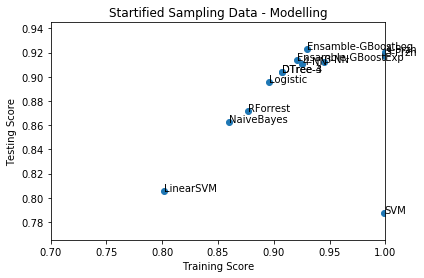

In [31]:
import matplotlib.pyplot as plt
plt.scatter(df.TrainAcc,df.TestAcc)

plt.xlabel("Training Score"); plt.ylabel("Testing Score")
plt.xlim(0.7,1.0)#; plt.ylim(0.5,1.0)
plt.title("Startified Sampling Data - Modelling")

for i, txt in enumerate(df.ClassifierName):
    plt.annotate(txt, (df.loc[i,'TrainAcc'],df.loc[i,'TestAcc']))

plt.show()

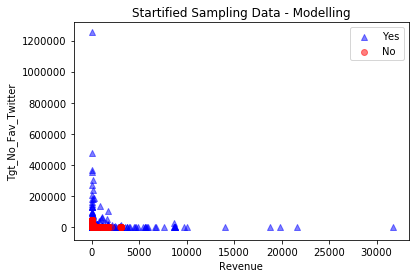

In [30]:
plt.scatter(x=X_train['Tgt_Revenue'].real[Y_train == 1],y=X_train['Tgt_No_Fav_Twitter'].real[Y_train == 1],
        marker='^',color='blue',alpha=0.5,label= "Yes")
plt.scatter(x=X_train['Tgt_Revenue'].real[Y_train == 0],y=X_train['Tgt_No_Fav_Twitter'].real[Y_train == 0],
            marker='o',color='red',alpha=0.5,label= "No")
plt.xlabel("Revenue"); plt.ylabel("Tgt_No_Fav_Twitter")
plt.title("Startified Sampling Data - Modelling")
plt.legend(loc='upper right', fancybox=True)
plt.show()

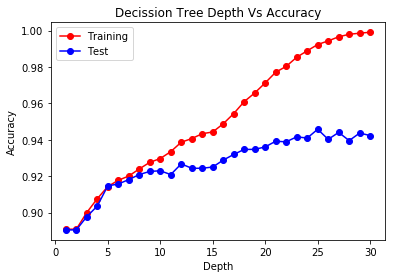

In [32]:
# Decission Tree Accuracy at various depths
tree = pd.DataFrame(columns=['Depth','Train','Test'])
for i in range(1,31):
    a = DecisionTreeClassifier(max_depth=i).fit(X_train,Y_train)
    tree.at[i,'Depth'] = i
    tree.at[i,'Train'] = accuracy_score(Y_train,a.predict(X_train))
    tree.at[i,'Test'] = accuracy_score(Y_test,a.predict(X_test))

plt.plot(tree.Depth,tree.Train,marker = "o",color='r',label='Training')
plt.plot(tree.Depth,tree.Test,marker = "o",color='b',label='Test')
plt.xlabel("Depth");plt.ylabel("Accuracy");plt.title("Decission Tree Depth Vs Accuracy")
plt.legend();plt.show()

In [ ]:
# ##cross validation K FOld

import warnings
warnings.filterwarnings("ignore")

def func1(name,train_score,test_score,df):
    i = max(0,len(df))
    df.at[i,'ClassifierName'] = name
    df.at[i,'TrainAcc'] = train_score
    df.at[i,'TestAcc'] = test_score
    return df

from sklearn.model_selection import KFold
kf = KFold(n_splits=15,random_state=12345)

df2 = pd.DataFrame()

for i in range(0,16):
    
    sum1 = 0; sum2 = 0;
    
    for xtrain_no, xtest_no in kf.split(X_Var):

        Y_train1 = Y_Var.loc[xtrain_no].fillna(0)
        X_train1 = X_Var.loc[xtrain_no].fillna(0)
        Y_test1 = Y_Var.loc[xtest_no].fillna(0)
        X_test1 = X_Var.loc[xtest_no].fillna(0)

        if i == 0:
            Log_reg = LogisticRegression().fit(X_train1,Y_train1)
            classifier = Log_reg
            name = "Logistic"            
        elif i == 1: 
            GBoost_Lin = GradientBoostingClassifier(n_estimators=100,random_state=12345).fit(X_train1, Y_train1)
            classifier = GBoost_Lin
            name = "GradientBoosting Lin"              
        elif i == 2:
            GBoost_exp = GradientBoostingClassifier(n_estimators=100,loss='exponential',random_state=12345).fit(X_train1, Y_train1)
            classifier = GBoost_exp
            name = "GradientBoosting Exp"
        elif i == 3:
            RForrest = RandomForestClassifier(max_depth=3, n_estimators=100).fit(X_train1,Y_train1)
            classifier = RForrest
            name = "RandomForrest"
        elif i == 4:
            SVM_15 = SVC(C=0.15,kernel='linear',max_iter =70,random_state=12345,tol=0.0000001).fit(X_train1,Y_train1)
            classifier = SVM_15
            name = "SVM 0.15"
        elif i == 5:
            SVM_1 = SVC(C=1,kernel='linear',max_iter =50).fit(X_train1,Y_train1)
            classifier = SVM_1
            name = "SVM C=1"
        elif i == 6:
            DTree_2 = DecisionTreeClassifier(max_depth=2).fit(X_train1,Y_train1)
            classifier = DTree_2
            name = "Decison Tree - 2"
        elif i == 7:
            DTree_3 = DecisionTreeClassifier(max_depth=3).fit(X_train1,Y_train1)
            classifier = DTree_3
            name = "Decison Tree - 3"
        elif i == 8:
            DTree_4 = DecisionTreeClassifier(max_depth=4).fit(X_train1,Y_train1)
            classifier = DTree_4
            name = "Decison Tree - 4"
        elif i == 9:
            DTree_5 = DecisionTreeClassifier(max_depth=5).fit(X_train1,Y_train1)
            classifier = DTree_5
            name = "Decision tree - 5"
        elif i == 10:
            Knn_3 = KNeighborsClassifier(n_neighbors=3).fit(X_train1,Y_train1)
            classifier = Knn_3
            name = "3-NN"
        elif i == 11:
            Knn_4 = KNeighborsClassifier(n_neighbors=4).fit(X_train1,Y_train1)
            classifier = Knn_4
            name = "4-NN"
        elif i == 12:
            Przn_3 = KNeighborsClassifier(n_neighbors=3,weights='distance').fit(X_train1,Y_train1)
            classifier = Przn_3
            name = "3-Parzen"
        elif i == 13:
            Przn_4 = KNeighborsClassifier(n_neighbors=4,weights='distance').fit(X_train1,Y_train1)
            classifier = Przn_4
            name = "4-Parzen"
        elif i == 14:
            Nai_Bayes = GaussianNB().fit(X_train1,Y_train1)
            classifier = Nai_Bayes
            name = "Naive Bayes"
        elif i == 15:
            SVM_Lin = LinearSVC(penalty='l2',max_iter=50,C = 0.5,random_state=99).fit(X_train1,Y_train1)
            classifier = SVM_Lin
            name = "SVM Linear"
            
        sum1 = sum1+accuracy_score(Y_train1,classifier.predict(X_train1))        
        sum2 = sum2+accuracy_score(Y_test1,classifier.predict(X_test1))            
        
    average1 = sum1/15
    average2 = sum2/15
    
    func1(name,average1,average2,df2)
    print i

In [50]:
df2.sort_values(['TestAcc'],ascending=[0])

,ClassifierName,TrainAcc,TestAcc
13,4-Parzen,0.999936,0.893812
11,4-NN,0.927742,0.893261
12,3-Parzen,0.999936,0.891878
10,3-NN,0.947432,0.891670
9,Decision tree - 5,0.913764,0.887046
7,Decison Tree - 3,0.899721,0.887044
6,Decison Tree - 2,0.891122,0.885106
0,Logistic,0.895772,0.884485
2,GradientBoosting Exp,0.923206,0.879931
1,GradientBoosting Lin,0.929746,0.879724


In [57]:
# ##cross validation K FOld

import warnings
warnings.filterwarnings("ignore")

del_cols2 = ['Tgt_Enterprise_Value_Mn'
             ,'Deal_Year','Deal_Type_MA','Deal_Value','Deal_Year'
             ,'Deal_Auction_Negotiation']
X_Var_New = X_Var.drop(del_cols2,axis=1)

def func1(name,train_score,test_score,df):
    i = max(0,len(df))
    df.at[i,'ClassifierName'] = name
    df.at[i,'TrainAcc'] = train_score
    df.at[i,'TestAcc'] = test_score
    return df

from sklearn.model_selection import KFold
kf = KFold(n_splits=15,random_state=12345)

df3 = pd.DataFrame()

for i in range(0,16):
    
    sum1 = 0; sum2 = 0;
    
    for xtrain_no, xtest_no in kf.split(X_Var_New):

        Y_train1 = Y_Var.loc[xtrain_no].fillna(0)
        X_train1 = X_Var_New.loc[xtrain_no].fillna(0)
        Y_test1 = Y_Var.loc[xtest_no].fillna(0)
        X_test1 = X_Var_New.loc[xtest_no].fillna(0)

        if i == 0:
            Log_reg = LogisticRegression(random_state=12345).fit(X_train1,Y_train1)
            classifier = Log_reg
            name = "Logistic"            
        elif i == 1: 
            GBoost_Lin = GradientBoostingClassifier(n_estimators=100,random_state=12345).fit(X_train1, Y_train1)
            classifier = GBoost_Lin
            name = "GradientBoosting Lin"              
        elif i == 2:
            GBoost_exp = GradientBoostingClassifier(n_estimators=100,loss='exponential',random_state=12345).fit(X_train1, Y_train1)
            classifier = GBoost_exp
            name = "GradientBoosting Exp"
        elif i == 3:
            RForrest = RandomForestClassifier(max_depth=3, n_estimators=100,random_state=12345).fit(X_train1,Y_train1)
            classifier = RForrest
            name = "RandomForrest"
        elif i == 4:
            SVM_15 = SVC(C=0.15,kernel='linear',max_iter =70,random_state=12345,tol=0.0000001).fit(X_train1,Y_train1)
            classifier = SVM_15
            name = "SVM C=0.15"
        elif i == 5:
            SVM_1 = SVC(C=1,kernel='linear',max_iter =50,random_state=12345).fit(X_train1,Y_train1)
            classifier = SVM_1
            name = "SVM C=1"
        elif i == 6:
            DTree_2 = DecisionTreeClassifier(max_depth=2).fit(X_train1,Y_train1)
            classifier = DTree_2
            name = "Decison Tree - 2"
        elif i == 7:
            DTree_3 = DecisionTreeClassifier(max_depth=3).fit(X_train1,Y_train1)
            classifier = DTree_3
            name = "Decison Tree - 3"
        elif i == 8:
            DTree_4 = DecisionTreeClassifier(max_depth=4).fit(X_train1,Y_train1)
            classifier = DTree_4
            name = "Decison Tree - 4"
        elif i == 9:
            DTree_5 = DecisionTreeClassifier(max_depth=5).fit(X_train1,Y_train1)
            classifier = DTree_5
            name = "Decision tree - 5"
        elif i == 10:
            Knn_3 = KNeighborsClassifier(n_neighbors=3).fit(X_train1,Y_train1)
            classifier = Knn_3
            name = "3-NN"
        elif i == 11:
            Knn_4 = KNeighborsClassifier(n_neighbors=4).fit(X_train1,Y_train1)
            classifier = Knn_4
            name = "4-NN"
        elif i == 12:
            Przn_3 = KNeighborsClassifier(n_neighbors=3,weights='distance').fit(X_train1,Y_train1)
            classifier = Przn_3
            name = "3-Parzen"
        elif i == 13:
            Przn_4 = KNeighborsClassifier(n_neighbors=4,weights='distance').fit(X_train1,Y_train1)
            classifier = Przn_4
            name = "4-Parzen"
        elif i == 14:
            Nai_Bayes = GaussianNB().fit(X_train1,Y_train1)
            classifier = Nai_Bayes
            name = "Naive Bayes"
        elif i == 15:
            SVM_Lin = LinearSVC(penalty='l2',max_iter=50,C = 0.5,random_state=12345).fit(X_train1,Y_train1)
            classifier = SVM_Lin
            name = "SVM Linear"
            
        sum1 = sum1+accuracy_score(Y_train1,classifier.predict(X_train1))        
        sum2 = sum2+accuracy_score(Y_test1,classifier.predict(X_test1))            
        
    average1 = sum1/15
    average2 = sum2/15
    
    func1(name,average1,average2,df3)

In [58]:
df3.sort_values(['TestAcc'],ascending=[0])

,ClassifierName,TrainAcc,TestAcc
13,4-Parzen,0.999936,0.893743
11,4-NN,0.927737,0.893192
12,3-Parzen,0.999936,0.892016
10,3-NN,0.947432,0.891670
7,Decison Tree - 3,0.899721,0.887044
1,GradientBoosting Lin,0.929662,0.886977
2,GradientBoosting Exp,0.923710,0.886494
9,Decision tree - 5,0.913912,0.886424
0,Logistic,0.895989,0.886074
6,Decison Tree - 2,0.891122,0.885106


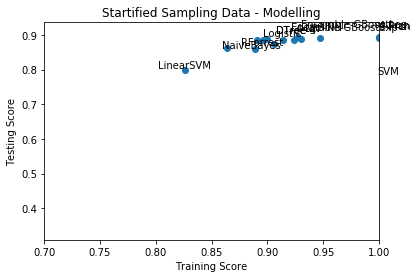

In [98]:
plt.scatter(df3.TrainAcc,df3.TestAcc)

plt.xlabel("Training Score"); plt.ylabel("Testing Score")
plt.xlim(0.7,1.0)#; plt.ylim(0.5,1.0)
plt.title("Startified Sampling Data - Modelling")

for i, txt in enumerate(df.ClassifierName):
    plt.annotate(txt, (df.loc[i,'TrainAcc'],df.loc[i,'TestAcc']))

plt.show()

In [93]:
# Log1 = LogisticRegression(random_state=12345).fit(X_Var_New,Y_Var)
# len(Log1.coef_.tolist()[0]);len(X_Var_New.columns)
# Log1.

In [95]:
# import statsmodels.api as sm
# logit_model=sm.Logit(Y_Var,X_Var_New)
# result=logit_model.fit(maxiter=35)
# print(result.summary())

In [96]:
# from sklearn import linear_model
# from scipy import stats
# import numpy as np


# from sklearn.feature_selection import chi2
# chi2(X_Var,Y_Var)
# print X_Var_New.shape,Y_Var.shape
# np.array(X_Var_New)


In [55]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# LDA
# sklearn_lda = LDA(n_components=2)
# X_lda_sklearn = sklearn_lda.fit(X_train, Y_train).transform(X_train)
# X_lda_sklearn.shape
# plot_step_lda()
# plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

In [62]:
# # Deleted "Buyer Country Dummy"
# del_cols_Cntry = [i for i in modelling_file.columns if "DBuyer_Cntry_" in i] + ['Buyer_Dom_Country']
# modelling_file_1 = modelling_file.drop(del_cols_Cntry,axis=1)


# Y_Var_1 = Y_Var   #.pop('Deal_Right_Cand_Acq')
# X_Var_1 = modelling_file_1
# X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_Var_1, Y_Var_1, test_size = 0.2, stratify=Y_Var_1)

# GBC_log_1 = GradientBoostingClassifier(n_estimators=100).fit(X_train_1, Y_train_1)
# GBC_grd_1 = GradientBoostingClassifier(n_estimators=100,loss='exponential').fit(X_train_1, Y_train_1)
# rf_1 = RandomForestClassifier(max_depth=3, n_estimators=100).fit(X_train_1,Y_train_1)

# print "Training Score - GBoost - Logistic: ",accuracy_score(Y_train_1,GBC_log_1.predict(X_train_1))
# print "Training Score - GBoost - Exp:",accuracy_score(Y_train_1,GBC_grd_1.predict(X_train_1))
# print "Training Score - R Forest:",accuracy_score(Y_train_1,rf_1.predict(X_train_1))


# print "Testing Score - GBoost - Logistic: ",accuracy_score(Y_test_1,GBC_log_1.predict(X_test_1))
# print "Testing Score - GBoost - Exp:",accuracy_score(Y_test_1,GBC_grd_1.predict(X_test_1))
# print "Testing Score - R Forest:",accuracy_score(Y_test_1,rf_1.predict(X_test_1))

# confusion_matrix(Y_test_1,GBC_log_1.predict(X_test_1))

In [ ]:
# # Deleting "Buyer Country Dummy" & Buyer Dominant Country

# del_cols_Cntry = [i for i in modelling_file.columns if "DBuyer_Cntry_" in i] + ['Buyer_Dom_Country']
# modelling_file_2 = modelling_file.drop(del_cols_Cntry,axis=1)


# Y_Var_2 = Y_Var   #.pop('Deal_Right_Cand_Acq')
# X_Var_2 = modelling_file_2
# X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_Var_2, Y_Var_2, test_size = 0.2, stratify=Y_Var_2)

# GBC_log_2 = GradientBoostingClassifier(n_estimators=100).fit(X_train_2, Y_train_2)
# GBC_grd_2 = GradientBoostingClassifier(n_estimators=100,loss='exponential').fit(X_train_2, Y_train_2)
# rf_2 = RandomForestClassifier(max_depth=3, n_estimators=100).fit(X_train_2,Y_train_2)

# print "Training Score - GBoost - Logistic: ",accuracy_score(Y_train_2,GBC_log_2.predict(X_train_2))
# print "Training Score - GBoost - Exp:",accuracy_score(Y_train_2,GBC_grd_2.predict(X_train_2))
# print "Training Score - R Forest:",accuracy_score(Y_train_2,rf_2.predict(X_train_2))

# print "Testing Score - GBoost - Logistic: ",accuracy_score(Y_test_2,GBC_log_2.predict(X_test_2))
# print "Testing Score - GBoost - Exp:",accuracy_score(Y_test_2,GBC_grd_2.predict(X_test_2))
# print "Testing Score - R Forest:",accuracy_score(Y_test_2,rf_2.predict(X_test_2))

# confusion_matrix(Y_test_2,GBC_log_2.predict(X_test_2))

In [64]:
# # Deleting "Deal Type Dummy"

# del_cols_dealtype = [i for i in modelling_file.columns if "DDeal_Type_" in i]
# modelling_file_3 = modelling_file.drop(del_cols_dealtype,axis=1)


# Y_Var_3 = Y_Var   #.pop('Deal_Right_Cand_Acq')
# X_Var_3 = modelling_file_3
# X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X_Var_3, Y_Var_3, test_size = 0.2, stratify=Y_Var_3)

# GBC_log_3 = GradientBoostingClassifier(n_estimators=100).fit(X_train_3, Y_train_3)
# GBC_grd_3 = GradientBoostingClassifier(n_estimators=100,loss='exponential').fit(X_train_3, Y_train_3)
# rf_3 = RandomForestClassifier(max_depth=3, n_estimators=100).fit(X_train_3,Y_train_3)

# print "Training Score - GBoost - Logistic: ",accuracy_score(Y_train_3,GBC_log_3.predict(X_train_3))
# print "Training Score - GBoost - Exp:",accuracy_score(Y_train_3,GBC_grd_3.predict(X_train_3))
# print "Training Score - R Forest:",accuracy_score(Y_train_3,rf_3.predict(X_train_3))

# print "Testing Score - GBoost - Logistic: ",accuracy_score(Y_test_3,GBC_log_3.predict(X_test_3))
# print "Testing Score - GBoost - Exp:",accuracy_score(Y_test_3,GBC_grd_3.predict(X_test_3))
# print "Testing Score - R Forest:",accuracy_score(Y_test_3,rf_3.predict(X_test_3))

# confusion_matrix(Y_test_3,GBC_log_3.predict(X_test_3))

In [65]:
# Deleting "Deal Type Dummy" & "Buyer Country Dummy" & "Buyer Dominant Country"

# del_cols_dealtype_Cntry = del_cols_dealtype + del_cols_Cntry
# modelling_file_4 = modelling_file.drop(del_cols_dealtype_Cntry,axis=1)


# Y_Var_4 = Y_Var   #.pop('Deal_Right_Cand_Acq')
# X_Var_4 = modelling_file_4
# X_train_4, X_test_4, Y_train_4, Y_test_4 = train_test_split(X_Var_4, Y_Var_4, test_size = 0.2, stratify=Y_Var_4)

# GBC_log_4 = GradientBoostingClassifier(n_estimators=100).fit(X_train_4, Y_train_4)
# GBC_grd_4 = GradientBoostingClassifier(n_estimators=100,loss='exponential').fit(X_train_4, Y_train_4)
# rf_4 = RandomForestClassifier(max_depth=3, n_estimators=100).fit(X_train_4,Y_train_4)

# print "Training Score - GBoost - Logistic: ",accuracy_score(Y_train_4,GBC_log_4.predict(X_train_4))
# print "Training Score - GBoost - Exp:",accuracy_score(Y_train_4,GBC_grd_4.predict(X_train_4))
# print "Training Score - R Forest:",accuracy_score(Y_train_4,rf_4.predict(X_train_4))

# print "Testing Score - GBoost - Logistic: ",accuracy_score(Y_test_4,GBC_log_4.predict(X_test_4))
# print "Testing Score - GBoost - Exp:",accuracy_score(Y_test_4,GBC_grd_4.predict(X_test_4))
# print "Testing Score - R Forest:",accuracy_score(Y_test_4,rf_4.predict(X_test_4))

# confusion_matrix(Y_test_4,GBC_log_4.predict(X_test_4))

In [63]:
# import numpy as np
# # np.sort(rf.feature_importances_,order=Desc)
# df = pd.DataFrame()
# df['col'] = X_Var.columns
# df['imp'] = rf.feature_importances_
# df.sort_values(by=['imp'],ascending=False).head(20)

# # zip(rf.feature_importances_.real,X_Var)
# # rf.estimator_params
# # Y_train.dtype
# # len(pd.unique(X_train.Tgt_Company_Type))
# # X_train.Tgt_Company_Type

In [34]:
# import numpy as np
# from sklearn import datasets
# iris = datasets.load_iris()
# iris.target.dtype
# # Use only data for 2 classes.
# X = iris.data[(iris.target==0) | (iris.target==1)]
# Y = iris.target[(iris.target==0) | (iris.target==1)]

# # Class 0 has indices 0-49. Class 1 has indices 50-99.
# # Divide data into 80% training, 20% testing.
# train_indices = list(range(40)) + list(range(50,90))
# test_indices = list(range(40,50)) + list(range(90,100))
# X_train = X[train_indices]
# X_test = X[test_indices]
# y_train = Y[train_indices]
# y_test = Y[test_indices]

# # Fake categorical variable.
# catVar = np.array(['a']*40 + ['b']*40)
# catVar = catVar.astype('category')
# X_train = np.concatenate((X_train, catVar), axis = 1)

# catVar = np.array(['a']*10 + ['b']*10)
# catVar = catVar.astype('category')
# X_test = np.concatenate((X_test, catVar), axis = 1)
# ###########################################################################
# y_test.dtype

# Model and test.
# clf = GradientBoostingClassifier(learning_rate=0.01,max_depth=8,n_estimators=50).fit(X_train, y_train)
# clf.predict_proba(X_test)
# prob = clf.predict_proba(X_test)[:,1]   # Only look at P(y==1).
# print prob

In [48]:
# dummy_list = list(modelling_file['Buyer_Countries'])
# dummy_list = [str.strip(str(x)) for x in dummy_list if str(x) != 'nan']
# dummy_list = [x.replace(",",";").split(";") for x in dummy_list]
# dummy_list = [y for x in dummy_list for y in x]
# dummy_list = [x.replace(" ","_") for x in dummy_list]
# dummy_list = list(pd.unique(dummy_list))
# dummy_list

# for p in range(len(dummy_list)):
#     for i in range(1,20): ##len(modelling_file)+1):
#         if pd.notnull(modelling_file.loc[i,'Buyer_Countries']):
#             l0 = list(set(modelling_file.loc[i,'Buyer_Countries'].replace(",",";").split(";")))
#             for j in l0: 
# #                 print j
#                 j = j.strip().replace(" ","_")
# #                 print j
# #                 print j,"--",p
#                 if j == dummy_list[p]:
#                         print dummy_list[p]


In [ ]:
# x_col_names = ['Tgt_Company_Type','Tgt_Dom_Sector','Tgt_Subsector','Tgt_HQ','Tgt_Age','Tgt_Employees','Tgt_Revenue','Tgt_Enterprise_Value_Mn'
#               ,'Tgt_No_Of_Patents','Tgt_No_Recent_Patents','Tgt_Impact_Of_Patents','Tgt_No_Fav_Twitter','Tgt_Sentiment_Score','Tgt_People'
#               ,'Buyer_Industry_BB','Buyer_Dom_Country','Buyer_Countries','Buyer_HQ','Buyer_Age','Buyer_Revenue','Buyer_EBIT','Buyer_Total_Assets'
#               ,'Buyer_R&D_Expense','Deal_Industry','Deal_Consideration_Offered','Deal_Type','Deal_Nature','Deal_Value','Deal_Year','Deal_Auction_Negotiation']
# y_col_names = ['Deal_TgtOrCompt']

In [ ]:
# dummy_list = list(modelling_file.Tgt_Subsector)
# dummy_list = [str.strip(str(x)) for x in dummy_list if str(x) != 'nan']
# dummy_list = [x.replace(",",";").split(";") for x in dummy_list]
# dummy_list = [y for x in dummy_list for y in x]
# dummy_list = [x.replace(" ","_") for x in dummy_list]
# dummy_list = list(pd.unique(dummy_list))

# for p in range(len(dummy_list)):
#     for i in range(1,(len(modelling_file)+1)):
#         if pd.notnull(modelling_file.loc[i,'Tgt_Subsector']):
#             l0 = modelling_file.loc[i,'Tgt_Subsector'].split(";") 
#             for j in l0: 
#                 j = j.strip(j).replace(" ","_")
#                 if j in dummy_list[p]:
#                       modelling_file.at[i,"DTgt_SubSect_"+dummy_list[p]] = 1

# for p in range(len(dummy_list)):
#     modelling_file["DTgt_SubSect_"+dummy_list[p]] = modelling_file["DTgt_SubSect_"+dummy_list[p]].fillna(0)